In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#Import the cleaned dataset 
data_path = ('../data/processed/cleaned_happiness_data.csv')
data_cleaned= pd.read_csv(data_path)

In [3]:
data_cleaned

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual,HappinessIndicator
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,1
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,1
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,1
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,1
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,1
...,...,...,...,...,...,...,...,...,...
1362,3.207,0.531,0.652,0.105,0.664,0.834,0.183,1.162,0
1363,3.204,0.758,0.690,0.069,0.654,0.766,0.112,0.905,0
1364,3.138,0.670,0.555,0.092,0.660,0.858,0.193,1.221,0
1365,2.392,1.417,0.530,0.398,0.474,0.891,0.061,-0.110,0


In [4]:
# Define features and target variables
features = data_cleaned.drop(['HappinessIndicator'], axis=1)
target = data_cleaned['HappinessIndicator']

In [5]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [7]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [10]:
# Print the accuracy report
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9890510948905109


In [11]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.98      0.99       143

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



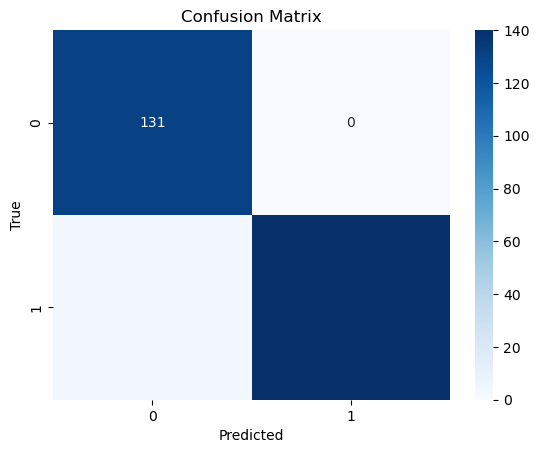

In [12]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Performance Summary

Upon fitting the logistic regression model to the dataset, we observed an exceedingly high accuracy score of approximately 98.9%. The classification report yielded high precision, recall, and F1-scores across both classes, indicating the model's proficient performance in classifying individuals as "happy" or "not happy." The following points detail the model's evaluation metrics:

- **Precision**: Exceptionally high for both classes, suggesting a minimal rate of false positives.
- **Recall**: Perfect for the "not happy" class, indicating no false negatives, and nearly perfect for the "happy" class.
- **F1-Score**: Close to 1 for both classes, denoting an excellent balance between precision and recall.
- **Support**: Reflects the balanced distribution of classes within the test dataset.

The confusion matrix provided additional insights:

- Correctly predicted "not happy" instances: 131
- Correctly predicted "happy" instances: 140
- False negatives: 3
- False positives: 0

### Interpretation and Recommendations

The high accuracy and F1-scores suggest the logistic regression model is highly effective. However, such high performance could potentially be a sign of overfitting. It is crucial to validate the model's reliability through further testing and evaluation. Recommendations to ensure robustness and validity of the model include:

1. **Cross-Validation**: To confirm consistency across various data subsets.
2. **Feature Importance Analysis**: To understand the drivers of the model's decisions.
3. **Testing More Complex Models**: Such as Random Forest or Gradient Boosting for comparative analysis.
4. **Regularization Techniques**: To prevent overfitting and enhance model generalization.
5. **Data Augmentation**: If data availability is limited, augmenting the dataset could improve model generalization.
6. **Anomaly Detection**: To identify and rectify data points that disproportionately influence the model.
7. **Domain Expert Consultation**: To align the model's predictions with expert knowledge.
8. **External Validation**: To assess performance on an unseen dataset and ensure generalizability.

These steps aim not only to potentially enhance model performance but to also affirm the reliability and applicability of the model to real-world scenarios.


### Random Forest Model

In [14]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier()

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [16]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test)

In [17]:
# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,131,0
Actual 1,0,143


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       143

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



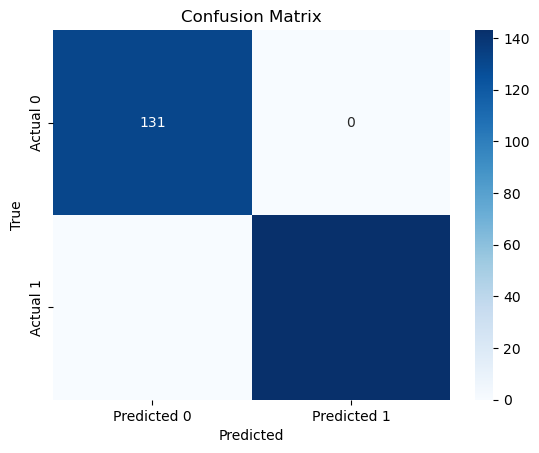

In [19]:
# Generate and display the confusion matrix
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree model

In [20]:
# Creating the decision tree classifier instance
decision_tree_model = tree.DecisionTreeClassifier()

In [21]:
# Fitting the model
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [22]:
# Making predictions using the testing data
decision_tree_predictions = decision_tree_model.predict(X_test)

In [23]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, decision_tree_predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, decision_tree_predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, decision_tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,131,0
Actual 1,0,143


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       143

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



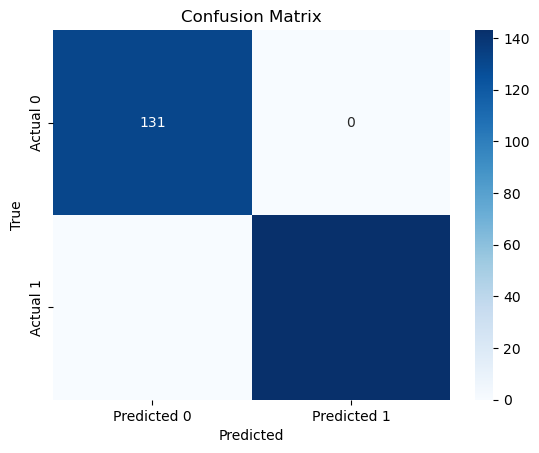

In [25]:
# Generate and display the confusion matrix
sns.heatmap(dt_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

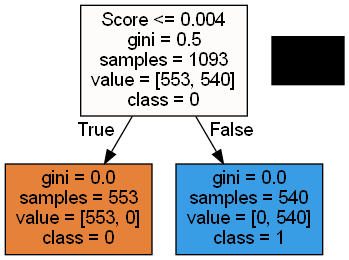

In [26]:
# Create DOT data
dot_data = tree.export_graphviz(
    decision_tree_model, out_file=None, feature_names=features.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())
